In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PLA import PlaPocket
from Regressao_Logistica import RegressaoLogistica
import numpy as np

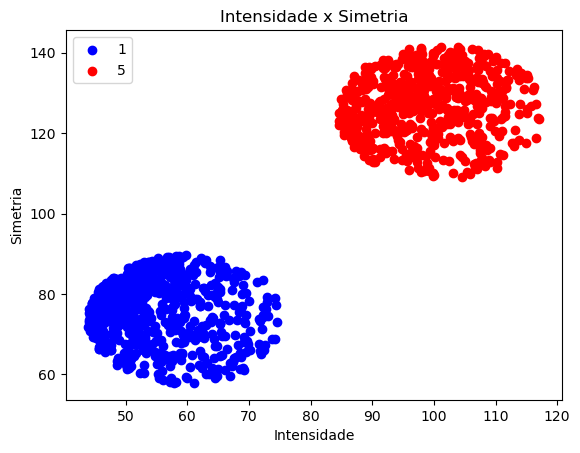

In [2]:
dados = pd.read_csv("Dados/train_reduzido_filter_1_5.csv", sep=";")
#dados = pd.read_csv("Dados/train_reduzido_filter_4_5.csv", sep=";")

# Separando os dados por classe
dados_label_1 = dados[dados['label'] == 1]
dados_label_5 = dados[dados['label'] == 5]

# Plotando os pontos para cada classe com cores diferentes e legendas
plt.scatter(dados_label_1["intensidade"], dados_label_1["simetria"], c='blue', label='1')
plt.scatter(dados_label_5["intensidade"], dados_label_5["simetria"], c='red', label='5')

plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.title("Intensidade x Simetria")
plt.legend()
plt.show()


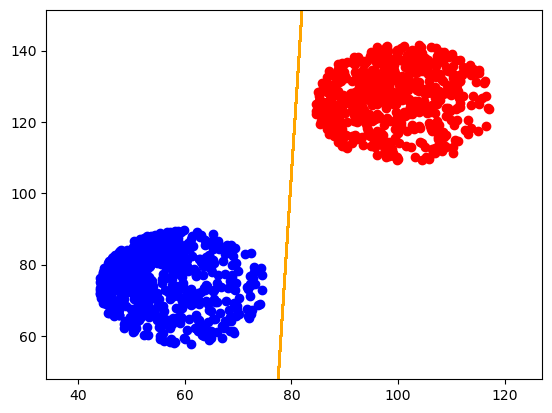

In [3]:
# adicionando o bias
X = dados[["intensidade", "simetria"]]
#ajustando os valores de y para o PLA
y = dados["label"]
# substitui os valores de y por 1 ou -1
y = y.replace(1, -1)
y = y.replace(5, 1)
y = y.values  

pla = PlaPocket(X, y)
pla.fit()
pla.plot()

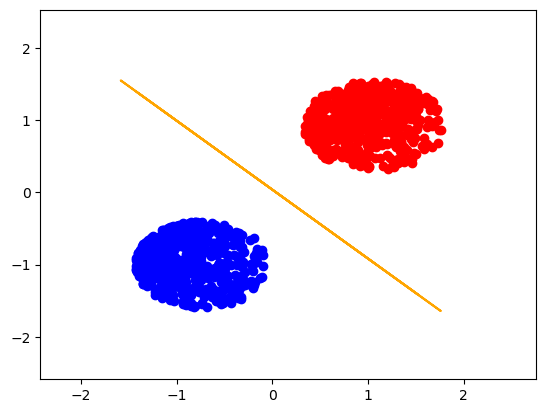

In [4]:
X = dados[["intensidade", "simetria"]].values
# Ajustando os valores de y para a regresaão logística
y = dados["label"]
# substitui os valores de y por 0 ou 1
y = y.replace(1, 0)
y = y.replace(5, 1)
y = y.values

def padronizar(X_tr):
    for i in range(np.shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
        
    return X_tr

X_treino = padronizar(X)
X_teste = padronizar(X)
regressao_logistica = RegressaoLogistica(X, y)
regressao_logistica.fit()
regressao_logistica.plot()
